<a href="https://colab.research.google.com/github/pA1nD/course-deep-learning/blob/master/L1_Deep_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic classification: Classify digits as numbers


This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

First: Import Tensorflow in version 2.

In [0]:
# %tensorflow_version only exists in Colab.
%tensorflow_version 2.x
!pip show tensorflow

import tensorflow as tf

Name: tensorflow
Version: 2.1.0rc1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-2.1.0/python3.6
Requires: gast, protobuf, grpcio, keras-applications, absl-py, google-pasta, tensorflow-estimator, termcolor, wrapt, six, astor, wheel, tensorboard, opt-einsum, numpy, keras-preprocessing
Required-by: stable-baselines, magenta, fancyimpute


Note three possible ways to execute commands in the notebook:

- *%tensorflow_version 2.x* - magic command
- *!pip show tensorflow* - shell command
- *import tensorflow as tf* - python code



## Import the MNIST dataset

This guide uses the MNIST dataset which contains 70,000 grayscale images in 10 categories. The images are provided at low resolution (28 by 28 pixels).

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often is used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.).

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the MNIST directly from TensorFlow. Import and load the MNIST data directly from TensorFlow:

In [0]:
# feeling fancy? use:
# mnist = tf.keras.datasets.fashion_mnist

mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [0]:
train_images.shape

(60000, 28, 28)


Likewise, there are 60,000 labels in the training set:

In [0]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The same for the test set:

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

Look at a single image

In [0]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### matplotlib

Import matplotlib. This is a python library for plots.

In [0]:
import matplotlib.pyplot as plt

If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

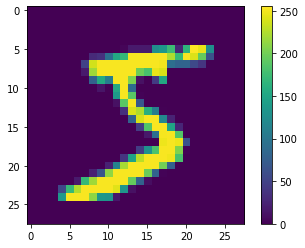

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Look at the train_images again and find min and max values:

In [0]:
train_images[0].min()

0

In [0]:
train_images[0].max()

255

## Preprocess the data

The data must be preprocessed before training the network.

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

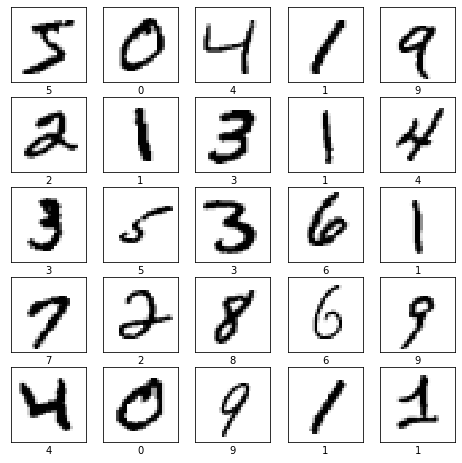

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a `tf.keras.layers.Dense` layer. That is a densely connected, or fully connected, neural layer. The `Dense` layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Print the layer details and see how many weights the model actually has.

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [0]:
model.fit(train_images, train_labels, batch_size=100, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 1.1806 - accuracy: 0.7242
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6518 - accuracy: 0.8494
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5418 - accuracy: 0.8657
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4890 - accuracy: 0.8749
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4567 - accuracy: 0.8807
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4345 - accuracy: 0.8856
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4180 - accuracy: 0.8891
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4051 - accuracy: 0.8914
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3946 - accuracy: 0.8935
Epoch 10/10
60

**epoch**: One run through the whole data data (60,000 in the training set)

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.90 (or 90%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3625 - accuracy: 0.9034

Test accuracy: 0.9034


It turns out that the accuracy on the test dataset is around the same as the accuracy on the training dataset. Great!

## Make predictions

With the model trained, you can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions.shape

(10000, 10)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
predictions[0]

array([5.18531713e-04, 3.30254034e-06, 4.45971848e-04, 2.22809170e-03,
       1.21457764e-04, 1.45966187e-04, 7.84468921e-06, 9.91418242e-01,
       3.00732150e-04, 4.80986340e-03], dtype=float32)

First note that softmax realy sums up to ~1 [(Representation error)](https://docs.python.org/2/tutorial/floatingpoint.html#representation-error):

In [0]:
predictions[3].sum()

1.0

### numpy

Import numpy. Numpy is a librry full of useful tools to process numeric values in Python.

In [0]:
import numpy as np

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different numbers. You can see which label has the highest confidence value:

In [0]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is an 7. Examining the test label shows that this classification is correct:

In [0]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

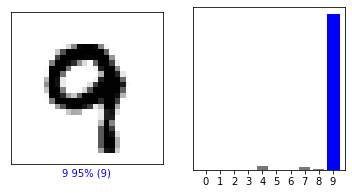

In [0]:
i = 99
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

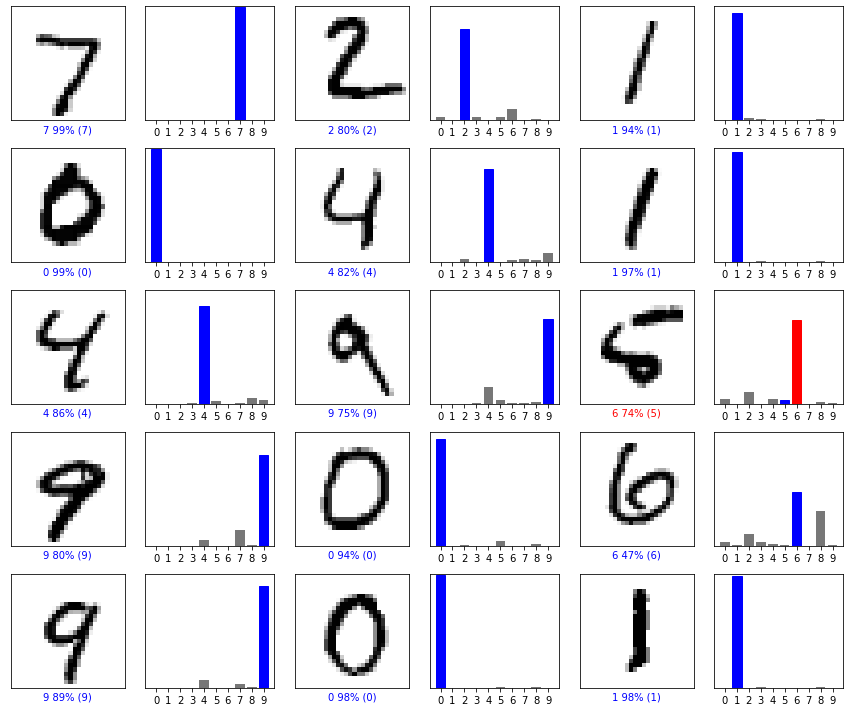

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8336108e-02 5.9193000e-04 7.9845124e-01 2.9557683e-02 2.7337840e-06
  3.2415897e-02 9.6317388e-02 1.7945665e-06 1.4311354e-02 1.3852973e-05]]


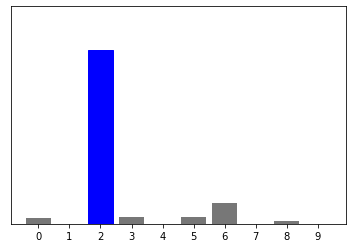

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
# _ = plt.xticks(range(10), range(10), rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [0]:
np.argmax(predictions_single[0])

2

## Further models

Here are further models:
- 5 Sigmoid layers
- 5 relu layers
- 3 relu layers + adam
- 3 relu layers + adam + learning rate decay
- 3 relu layers + adam + learning rate decay + dropout

In [0]:
def plot(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 2.3048 - accuracy: 0.1083 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3005 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 2.3007 - accuracy: 0.1124 - val_loss: 2.3002 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 2.3005 - accuracy: 0.1124 - val_loss: 2.2999 - val_accuracy: 0.1135


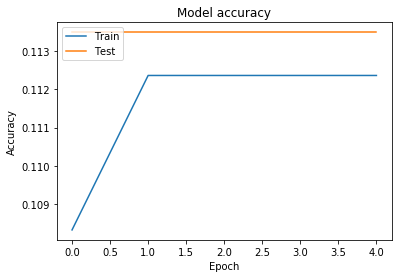

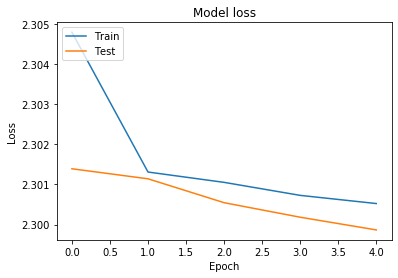

In [0]:
model = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(100, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(30, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, batch_size=100, epochs=5, validation_data=(test_images, test_labels))
plot(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 1.2162 - accuracy: 0.6581 - val_loss: 0.4896 - val_accuracy: 0.8676
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4078 - accuracy: 0.8835 - val_loss: 0.3433 - val_accuracy: 0.9022
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3166 - accuracy: 0.9090 - val_loss: 0.2850 - val_accuracy: 0.9152
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2733 - accuracy: 0.9212 - val_loss: 0.2494 - val_accuracy: 0.9266
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2425 - accuracy: 0.9301 - val_loss: 0.2233 - val_accuracy: 0.9334


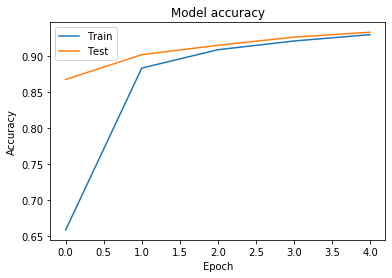

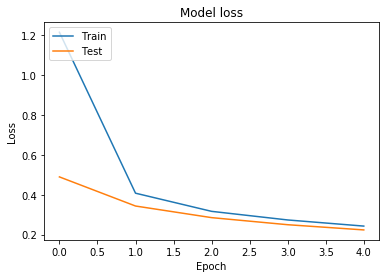

In [0]:
model = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, batch_size=100, epochs=5, validation_data=(test_images, test_labels))
plot(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2721 - accuracy: 0.9193 - val_loss: 0.1359 - val_accuracy: 0.9574
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1026 - accuracy: 0.9696 - val_loss: 0.0979 - val_accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0692 - accuracy: 0.9788 - val_loss: 0.0837 - val_accuracy: 0.9748
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0794 - val_accuracy: 0.9735
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0689 - val_accuracy: 0.9782


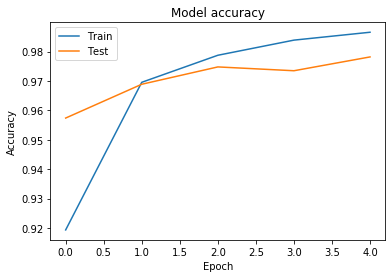

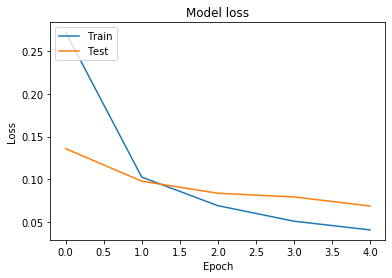

In [0]:
model = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, batch_size=100, epochs=5, validation_data=(test_images, test_labels))
plot(history)

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2412 - accuracy: 0.9274 - val_loss: 0.1429 - val_accuracy: 0.9577

Epoch 00002: LearningRateScheduler reducing learning rate to 0.006.
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0980 - accuracy: 0.9712 - val_loss: 0.1146 - val_accuracy: 0.9665

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0036.
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0870 - val_accuracy: 0.9765

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0021599999999999996.
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0720 - val_accuracy: 0.9806

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00

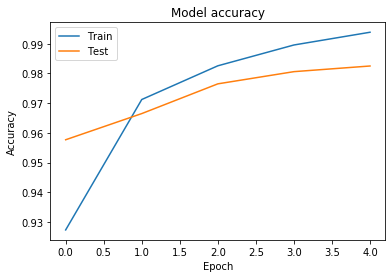

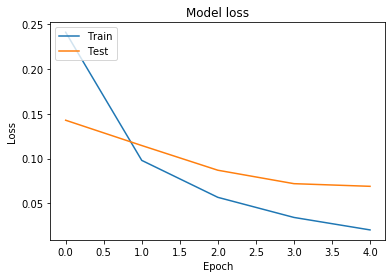

In [0]:
import math
# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

model = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, batch_size=100, epochs=5, validation_data=(test_images, test_labels), callbacks=[lr_decay_callback])
plot(history)

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4407 - accuracy: 0.8752 - val_loss: 0.2003 - val_accuracy: 0.9436

Epoch 00002: LearningRateScheduler reducing learning rate to 0.006.
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2347 - accuracy: 0.9375 - val_loss: 0.1452 - val_accuracy: 0.9623

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0036.
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1794 - accuracy: 0.9518 - val_loss: 0.1197 - val_accuracy: 0.9672

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0021599999999999996.
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1400 - accuracy: 0.9607 - val_loss: 0.1033 - val_accuracy: 0.9710

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00

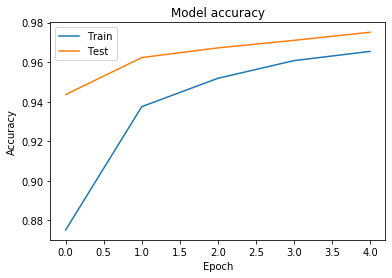

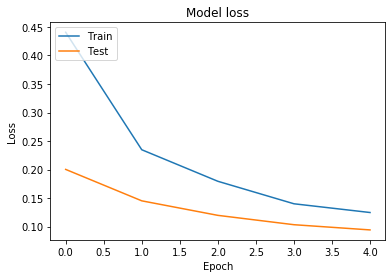

In [0]:
import math
# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

model = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, batch_size=100, epochs=5, validation_data=(test_images, test_labels), callbacks=[lr_decay_callback])
plot(history)

#### Alternative Optimizer (SGD + Momentum)

Here are examples for different configurations of the optimizer function:

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=False),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Alternative 2: Visualize Training

In [0]:
BATCH_SIZE = 100

import IPython.display as display
import numpy as np

class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = 60000//BATCH_SIZE

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(16, 7))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()
      
    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)
    
    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    display.clear_output(wait=True)
    
    for k,v in self.batch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k)
      
    for k,v in self.epoch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.epoch_step) / self.steps_per_epoch, v, label=k, linewidth=3)
      
    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    display.display(self.fig)

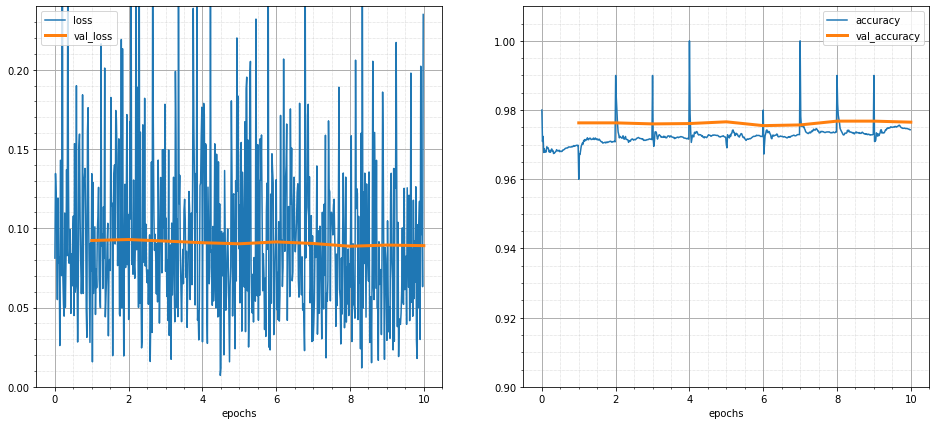

60000/60000 [==============================] - 4s 71us/sample - loss: 0.0918 - accuracy: 0.9743 - val_loss: 0.0890 - val_accuracy: 0.9765


In [0]:
plot_training = PlotTraining(sample_rate=10, zoom=5)
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=10, validation_data=(test_images, test_labels), callbacks=[plot_training])

## Licence

Original Copyright 2018 The TensorFlow Authors with changes in 2020 by Björn Schmidtke for GSERM.


In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
# Copyright (c) 2020 Björn Schmidtke
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.